In [34]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("HungerDataAnalysis").getOrCreate()

In [35]:
# read in data
wasting_df = spark.read.csv("Wasting.csv", header=True, inferSchema=True)
expenditure_df = spark.read.csv("Expenditure.csv", header=True, inferSchema=True)
malnutrition_df = spark.read.csv("Malnutrition.csv", header=True, inferSchema=True)


In [36]:
wasting_df.show()
expenditure_df.show()
malnutrition_df.show()

+---------------+-----------+----+------------------+--------------------------------+
|Area Code (FAO)|       Area|Year|GDP_Per_Capita_PPP|Children_Under_5_Wasting_Percent|
+---------------+-----------+----+------------------+--------------------------------+
|              1|    Armenia|2017|           12509.6|                            null|
|              1|    Armenia|2018|           13231.4|                            null|
|              1|    Armenia|2019|           14317.6|                            null|
|              1|    Armenia|2020|           13357.7|                            null|
|              1|    Armenia|2021|           14193.1|                            null|
|              1|    Armenia|2022|              null|                             4.4|
|              2|Afghanistan|2017|            2096.1|                            null|
|              2|Afghanistan|2018|            2060.7|                             5.1|
|              2|Afghanistan|2019|         

In [37]:
# Print Schema
wasting_df.printSchema()
expenditure_df.printSchema()
malnutrition_df.printSchema()

root
 |-- Area Code (FAO): integer (nullable = true)
 |-- Area: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- GDP_Per_Capita_PPP: double (nullable = true)
 |-- Children_Under_5_Wasting_Percent: double (nullable = true)

root
 |-- Area Code (FAO): integer (nullable = true)
 |-- Area: string (nullable = true)
 |-- Year_Code: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Agriculture_CG: double (nullable = true)
 |-- Total_Expenditure_CG: double (nullable = true)

root
 |-- Area Code (FAO): integer (nullable = true)
 |-- Area: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Incidence of malnutrition: double (nullable = true)



In [38]:
from pyspark.sql.types import (StructField,StringType,IntegerType,FloatType,StructType)
#difine convert
def convert_double_to_float(df):
    for column, dtype in df.dtypes:
        if dtype == 'double':
            df = df.withColumn(column, df[column].cast(FloatType()))
    return df
# convert double to float
wasting_df = convert_double_to_float(wasting_df)
expenditure_df = convert_double_to_float(expenditure_df)
malnutrition_df = convert_double_to_float(malnutrition_df)

wasting_df.printSchema()
expenditure_df.printSchema()
malnutrition_df.printSchema()

root
 |-- Area Code (FAO): integer (nullable = true)
 |-- Area: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- GDP_Per_Capita_PPP: float (nullable = true)
 |-- Children_Under_5_Wasting_Percent: float (nullable = true)

root
 |-- Area Code (FAO): integer (nullable = true)
 |-- Area: string (nullable = true)
 |-- Year_Code: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Agriculture_CG: float (nullable = true)
 |-- Total_Expenditure_CG: float (nullable = true)

root
 |-- Area Code (FAO): integer (nullable = true)
 |-- Area: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Incidence of malnutrition: float (nullable = true)



In [39]:
# Describe statistics
wasting_df.describe().show()
expenditure_df.describe().show()
malnutrition_df.describe().show()

+-------+-----------------+-----------+------------------+------------------+--------------------------------+
|summary|  Area Code (FAO)|       Area|              Year|GDP_Per_Capita_PPP|Children_Under_5_Wasting_Percent|
+-------+-----------------+-----------+------------------+------------------+--------------------------------+
|  count|             1046|       1046|              1046|               937|                             260|
|   mean|128.8116634799235|       null|2019.3001912045888|20927.263276481834|                4.94807695087332|
| stddev|75.64156155927061|       null|1.6203667733424387|21809.174542255176|               3.641963239691586|
|    min|                1|Afghanistan|              2017|             705.0|                             0.1|
|    max|              351|   Zimbabwe|              2022|          128437.0|                            18.7|
+-------+-----------------+-----------+------------------+------------------+--------------------------------+



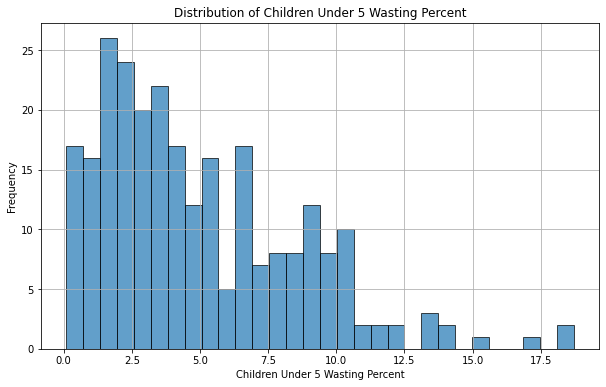

In [40]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

wasting_rate_df = wasting_df.select("Children_Under_5_Wasting_Percent").toPandas()

# Draw histogram
plt.figure(figsize=(10, 6))
plt.hist(wasting_rate_df['Children_Under_5_Wasting_Percent'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Children Under 5 Wasting Percent')
plt.ylabel('Frequency')
plt.title('Distribution of Children Under 5 Wasting Percent')
plt.grid(True)
plt.show()

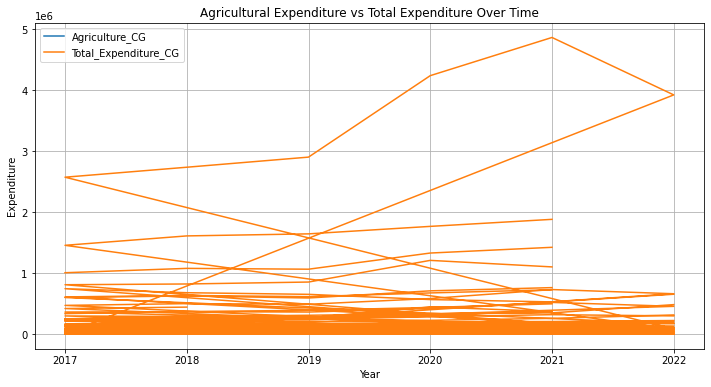

In [41]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ExpenditureAnalysis").getOrCreate()

expenditure_pd_df = expenditure_df.select("Year", "Agriculture_CG", "Total_Expenditure_CG").toPandas()

plt.figure(figsize=(12, 6))
plt.plot(expenditure_pd_df['Year'], expenditure_pd_df['Agriculture_CG'], label='Agriculture_CG')
plt.plot(expenditure_pd_df['Year'], expenditure_pd_df['Total_Expenditure_CG'], label='Total_Expenditure_CG')

plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Agricultural Expenditure vs Total Expenditure Over Time')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1080x576 with 0 Axes>

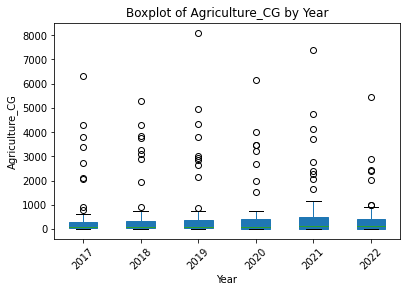

<Figure size 1080x576 with 0 Axes>

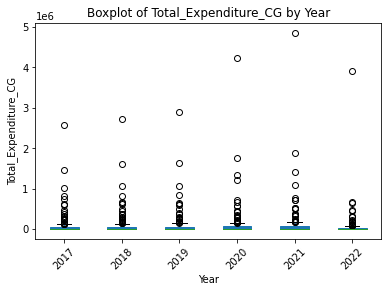

In [43]:
# convert to Pandas DataFrame
expenditure_pd_df = expenditure_df.select("Year", "Agriculture_CG", "Total_Expenditure_CG").toPandas()

# Draw box plot
plt.figure(figsize=(15, 8))

Box plot of # Agriculture_CG
expenditure_pd_df.boxplot(column="Agriculture_CG", by="Year", grid=False, patch_artist=True)
plt.title('Boxplot of Agriculture_CG by Year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Agriculture_CG')
plt.xticks(rotation=45)
plt.show()

# Box plot of Total_Expenditure_CG
plt.figure(figsize=(15, 8))
expenditure_pd_df.boxplot(column="Total_Expenditure_CG", by="Year", grid=False, patch_artist=True)
plt.title('Boxplot of Total_Expenditure_CG by Year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Total_Expenditure_CG')
plt.xticks(rotation=45)
plt.show()

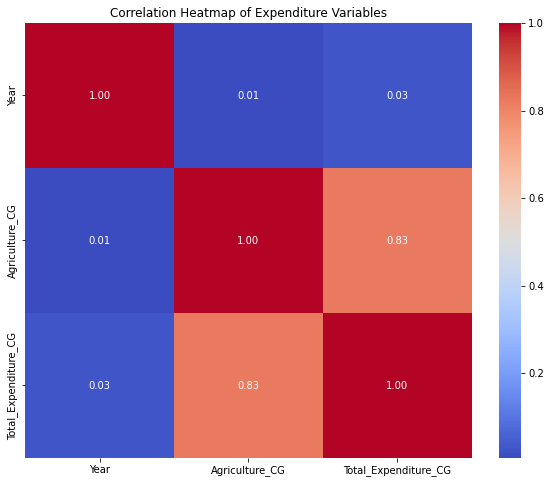

In [45]:
import seaborn as sns
# 选择相关列并转换为Pandas DataFrame
expenditure_pd_df = expenditure_df.select("Year", "Agriculture_CG", "Total_Expenditure_CG").toPandas()

# 计算相关矩阵
correlation_matrix = expenditure_pd_df.corr()

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Expenditure Variables')
plt.show()

<Figure size 1080x576 with 0 Axes>

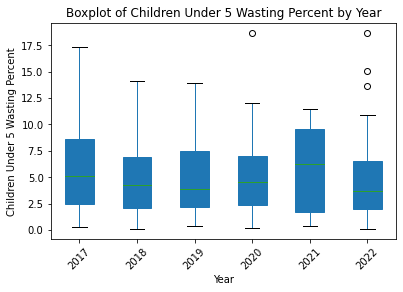

In [46]:
# 选择相关列并转换为Pandas DataFrame
wasting_pd_df = wasting_df.select("Year", "Children_Under_5_Wasting_Percent").toPandas()

# 绘制箱型图
plt.figure(figsize=(15, 8))
wasting_pd_df.boxplot(column="Children_Under_5_Wasting_Percent", by="Year", grid=False, patch_artist=True)
plt.title('Boxplot of Children Under 5 Wasting Percent by Year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Children Under 5 Wasting Percent')
plt.xticks(rotation=45)
plt.show()

In [49]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
# Define a function to check for missing values
def check_missing_values(df, df_name):
     missing_values = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
     print(f"Missing values in {df_name}:")
     missing_values.show()

# Check for missing values in each dataset
check_missing_values(wasting_df, "Wasting.csv")
check_missing_values(expenditure_df, "Expenditure.csv")
check_missing_values(malnutrition_df, "Malnutrition.csv")

Missing values in Wasting.csv:
+---------------+----+----+------------------+--------------------------------+
|Area Code (FAO)|Area|Year|GDP_Per_Capita_PPP|Children_Under_5_Wasting_Percent|
+---------------+----+----+------------------+--------------------------------+
|              0|   0|   0|               109|                             786|
+---------------+----+----+------------------+--------------------------------+

Missing values in Expenditure.csv:
+---------------+----+---------+----+--------------+--------------------+
|Area Code (FAO)|Area|Year_Code|Year|Agriculture_CG|Total_Expenditure_CG|
+---------------+----+---------+----+--------------+--------------------+
|              0|   0|        0|   0|          1077|                 511|
+---------------+----+---------+----+--------------+--------------------+

Missing values in Malnutrition.csv:
+---------------+----+----+-------------------------+
|Area Code (FAO)|Area|Year|Incidence of malnutrition|
+---------------+-

In [52]:
import pandas as pd

def detect_outliers(df, df_name):
     # Convert Spark DataFrame to Pandas DataFrame
     df_pd = df.toPandas()
    
     # Calculate quartiles
     Q1 = df_pd.quantile(0.25)
     Q3 = df_pd.quantile(0.75)
     IQR = Q3 - Q1
    
     # Define extreme values as values less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
    
     # Find extreme values
     outliers = ((df_pd < lower_bound) | (df_pd > upper_bound)).any(axis=1)
    
     # Count the number of extreme values in each column
     outliers_count = ((df_pd < lower_bound) | (df_pd > upper_bound)).sum()
    
     print(f"Outliers in {df_name}:")
     print(outliers_count)
     print(f"Total number of rows with outliers in {df_name}: {outliers.sum()}")
     print("\n")

# Check for extreme values and outliers in each data set
detect_outliers(wasting_df, "Wasting.csv")
detect_outliers(expenditure_df, "Expenditure.csv")
detect_outliers(malnutrition_df, "Malnutrition.csv")

/tmp/ipykernel_3094/1411297587.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df_pd < lower_bound) | (df_pd > upper_bound)).any(axis=1)
/tmp/ipykernel_3094/1411297587.py:20: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_count = ((df_pd < lower_bound) | (df_pd > upper_bound)).sum()


Outliers in Wasting.csv:
Area                                 0
Area Code (FAO)                      0
Children_Under_5_Wasting_Percent     4
GDP_Per_Capita_PPP                  37
Year                                 0
dtype: int64
Total number of rows with outliers in Wasting.csv: 41




/tmp/ipykernel_3094/1411297587.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df_pd < lower_bound) | (df_pd > upper_bound)).any(axis=1)
/tmp/ipykernel_3094/1411297587.py:20: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_count = ((df_pd < lower_bound) | (df_pd > upper_bound)).sum()


Outliers in Expenditure.csv:
Agriculture_CG           53
Area                      0
Area Code (FAO)           0
Total_Expenditure_CG    122
Year                      0
Year_Code                 0
dtype: int64
Total number of rows with outliers in Expenditure.csv: 141


Outliers in Malnutrition.csv:
Area                          0
Area Code (FAO)               0
Incidence of malnutrition    27
Year                          0
dtype: int64
Total number of rows with outliers in Malnutrition.csv: 27




/tmp/ipykernel_3094/1411297587.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df_pd < lower_bound) | (df_pd > upper_bound)).any(axis=1)
/tmp/ipykernel_3094/1411297587.py:20: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_count = ((df_pd < lower_bound) | (df_pd > upper_bound)).sum()
